L’algorithme k-means est l’algorithme de clustering le plus connu et le plus utilisé, du fait de sa simplicité de mise en
œuvre. Il partitionne les données d’une image en K clusters. 

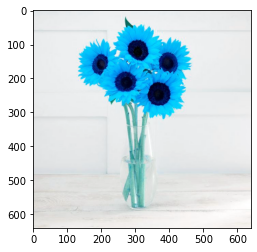

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
from skimage.restoration import denoise_tv_chambolle

#Charger l'image
image = cv2.imread('sunflower.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))
clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
#Sauvegarder image
cv2.imwrite('sf.jpg', quant)
plt.imshow(image)

cv2.imread('sunflower.jpg')
#La fonction  waitKey permettra de mettre la fenêtre en attente d'un événement. 
cv2.waitKey(0)
#La fonction destroyAllWindows libérera la mémoire occupée par la fenêtre après que celle-ci ait été fermée.
cv2.destroyAllWindows()

Une image est une collection ou un ensemble de pixels différents dont la segmentation d'image est une opération de traitement d'images qui a pour but de rassembler des pixels entre eux suivant des critères pré-définis. 

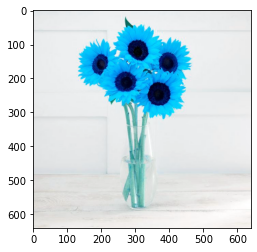

In [56]:
image = cv2.imread('sunflower.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 15)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('sf2.jpg', quant)
plt.imshow(image)

cv2.imread('sunflower.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

Plus on augmente le nombre des clusters plus l'image se ressemble au original et devient plus claire (détails)

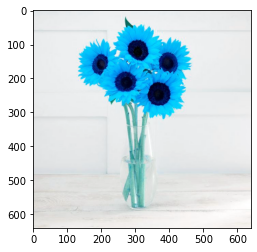

In [59]:
plt.imshow(image)

In [5]:
!pip install opencv-python

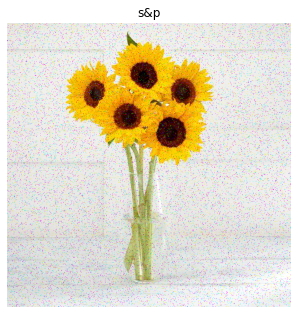

In [146]:
import skimage.io
import matplotlib.pyplot as plt
img_path="sunflower.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
plotnoise(img, "s&p", r,c,1)
plt.show()


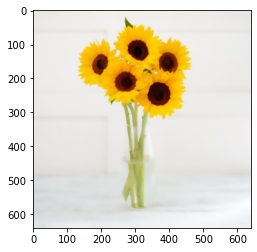

In [145]:
new_image=denoise_tv_chambolle(img,weight=0.1,multichannel=True)
plt.imshow(new_image)

Pour supprimer la buit "salt&pepper" ,j'ai choisi le filtre médian qui élimine mieux le bruit du sel et du poivre que les filtres moyen et gaussien et il ne produit pas d'artefacts sur une image couleur.
Le filtre median calcule la médiane des intensités de pixels qui entourent le pixel central dans un noyau nxn . 
La médiane remplace alors l'intensité de pixel du pixel central. 
La fonction 'medianBlur' de la bibliothèque Open-CV peut être utilisée pour implémenter un filtre médian.

Le clustering(segmentation) est une étape de base du traitement d’une image. Cette opération a pour but de séparer différentes zones homogènes d’une image, afin d’organiser les objets en groupes (clusters) dont les membres ont en commun diverses propriétés (intensité, couleur, texture, etc). 
Les images prétraitées peuvent permettre à un modèle de base d'atteindre une précision élevée par rapport à un modèle plus complexe formé sur des images qui n'ont pas été prétraitées.